# Finding Features

# Non-Negative Matrix Factorisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
strings = ["Human machine interface for ABC computer applications",
"A survey of user opinion of computer system response time",
"The EPS user interface management system",
"System and human system engineering testing of EPS",
"Relation of user perceived response time to error measurement",
"The generation of random, binary, ordered trees",
"The intersection graph of paths in trees",
"Graph minors IV: Widths of trees and well-quasi-ordering",
"Graph minors: A survey"]
string_short = ["m1","m2", "m3", "m4", "m5", "g1", "g2", 'g3', "g4"]
t_v3 = TfidfVectorizer( max_features=12,
                                   stop_words='english', sublinear_tf=True)

titles = t_v3.fit_transform(strings)
titles_d=titles.todense()

In [3]:
def frob_diff(A, W, H):
    diff = np.sum(np.square(np.subtract(A, np.dot(W,H))))
    return diff
def update_W(A, W, H):
    AHT = np.dot(A, H.T)
    WHHT = np.dot(W, np.dot(H, H.T))
    W = np.multiply(W, np.divide(AHT, WHHT))
    return np.divide(W, np.sum(W, axis=1))   
def update_H(A, W, H):
    WTA = np.dot(W.T, A)
    WTWH = np.dot(np.dot(W.T, W), H)
    return np.multiply(H, np.divide(WTA, WTWH))


In [4]:
def my_nmf(A, d):
    diff = 1000
    eps = .001
    m = A.shape[0]
    n = A.shape[1]
    W = np.random.random((m,d))
    H = np.random.random((d,n))
    old = 1000
    new = 1000
    n = 1
    while diff>eps:
        old = new
        W = update_W(A, W, H)
        H = update_H(A, W, H)
        new = frob_diff(A, W, H)
        diff = abs(new - old)
        n+=1
        if n==100:
            break
    return W, H

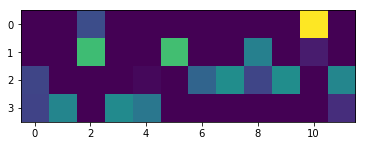

In [5]:
A = titles_d
d = 4

W, H = my_nmf(A, 4)

plt.imshow(H)
plt.show();

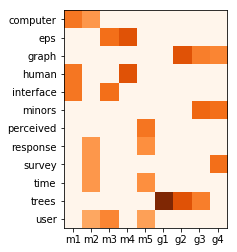

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(titles_d.T, cmap=plt.cm.Oranges)
ax.set_yticks(np.arange(len(t_v3.get_feature_names())))
ax.set_xticks(np.arange(len(strings)))
ax.set_yticklabels(t_v3.get_feature_names());
ax.set_xticklabels(string_short); plt.savefig("./images/titles_A.png", bbox_inches='tight');

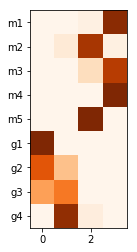

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(W, cmap=plt.cm.Oranges)

ax.set_yticks(np.arange(len(strings)))
ax.set_yticklabels(string_short); plt.savefig("./images/titles_W.png", bbox_inches='tight');

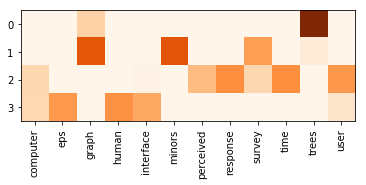

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(H, cmap=plt.cm.Oranges)

ax.set_xticks(np.arange(len(t_v3.get_feature_names())));
ax.set_xticklabels(t_v3.get_feature_names(), rotation='vertical'); plt.savefig("./images/titles_H.png", bbox_inches='tight');

# Compare with library function

In [9]:
nmf = NMF(n_components=d, init='random', random_state=0)
W = nmf.fit_transform(A)

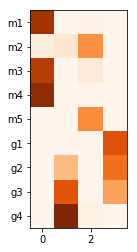

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(W, cmap=plt.cm.Oranges)

ax.set_yticks(np.arange(len(strings)))
ax.set_yticklabels(string_short); plt.savefig("./images/titles_W.png", bbox_inches='tight');

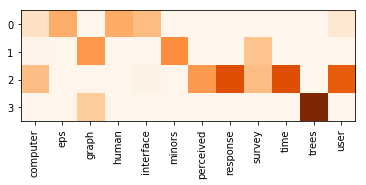

In [11]:
H = nmf.components_
fig, ax = plt.subplots()
im = ax.imshow(H, cmap=plt.cm.Oranges)

ax.set_xticks(np.arange(len(t_v3.get_feature_names())));
ax.set_xticklabels(t_v3.get_feature_names(), rotation='vertical'); plt.savefig("./images/titles_H.png", bbox_inches='tight');

# to get words associated with each 'Topic' 

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
n_top_words = 3
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = t_v3.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: human eps interface
Topic #1: minors graph survey
Topic #2: time response user
Topic #3: trees graph eps



# News Group Dataset

In [58]:
n_features = 100
n_samples = 2000
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
t_v1 = TfidfVectorizer(max_features=n_features, max_df = 0.7, stop_words='english' )
news = t_v1.fit_transform(data_samples)
news_d=news.todense()

In [59]:
d = 20
nmf = NMF(n_components=d, init='random', random_state=0)
W = nmf.fit_transform(news_d)

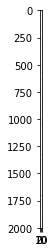

In [60]:
fig, ax = plt.subplots()
im = ax.imshow(W, cmap=plt.cm.Oranges)

plt.savefig("./images/news_W.png", bbox_inches='tight');

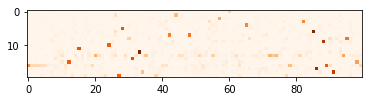

In [61]:
H = nmf.components_
fig, ax = plt.subplots()
im = ax.imshow(H, cmap=plt.cm.Oranges)

plt.savefig("./images/titles_H.png", bbox_inches='tight');

In [63]:
n_top_words = 10
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = t_v1.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: people things state number life believe different law government come
Topic #1: know don want need doesn let sure didn look bit
Topic #2: new great old computer things years need version little question
Topic #3: thanks mail information need send help card want question like
Topic #4: problem make try file using high work help question need
Topic #5: edu send information mail try need public computer program available
Topic #6: think don case need course just second little going question
Topic #7: like just really don probably believe want look things thing
Topic #8: windows file using program version software help graphics mail work
Topic #9: use key want need doesn number data place work power
Topic #10: does information using doesn key read make card program thing
Topic #11: com really want case mail send little 16 file software
Topic #12: good want thing using best read look little better course
Topic #13: way did right say governmen